# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I, 
- **Donald Nkabinde**, 
- **Kobus Leach**,
- **Insert name here**,
- **Insert name here**,
- **Mfanafuthi Molefe**,

confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

pd.set_option("display.max_rows", None) # to see all rows for the stats part
pd.set_option("display.max_columns", None) # to see all columns for the stats part

For this task, exploritory data analysis (EDA) will be utilised to analyse and explore the data to reveal insights, patterns, correlation, etc. This activity will reveal relevant features that will be used to create a model/models capable of forecasting the three hourly demand shortfalls. The following Python libraries will be used for this:

- **[Numpy](https://numpy.org/)**: NumPy is a fundamental library for numerical computing in Python. It provides efficient array manipulation and mathematical operations, making it essential for many scientific computations.

- **[Pandas](https://pandas.pydata.org/)**: Pandas is a powerful library for data manipulation and analysis. It offers data structures like DataFrames that allow for easy handling, cleaning, and exploration of structured data.

- **[Matplotlib](https://matplotlib.org/)**: Matplotlib is a plotting library that enables the creation of various types of visualisations, such as line plots, scatter plots, histograms, and more. It provides flexibility and customisation options for creating publication-quality figures.

- **[Seaborn](https://seaborn.pydata.org/)**: Seaborn is a data visualisation library built on top of Matplotlib. It provides a simplified interface for creating attractive statistical graphics, including heatmaps, violin plots, and joint plots.

- **[Scikit-learn](https://scikit-learn.org/stable/)**: Scikit-learn is a machine learning library that offers a wide range of algorithms for classification, regression, clustering, and dimensionality reduction. It provides an easy-to-use API for model training, evaluation, and prediction.

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [33]:
df1 = pd.read_csv("df_train.csv") # Original data
df_train = df1.copy() # Copy data that we will use for EDA
df2 = pd.read_csv("df_test.csv")
df_test = df2.copy()
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


# Non-Graphical Analysis

In [34]:
df_train.shape

(8763, 49)

Our train dataset comprises of 8763 entries, and 48 features + the target feature (load_shortfall_3h). In total, there are 49 features with the following names:

In [35]:
df_train.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

Before we start with the statistical analysis, we explore the missing values in each of the columns:

In [36]:
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

The `Valencia_pressure` feature is the only feature with missing values and it is missing 2068 entries.

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

This reveals that there are 46 numerical features (45 of those have a `float64` datatype while only one of those is `int64`) and 3 non-numerical features. First exploring the numerical data we get:

In [38]:
# df_train.describe().T
with pd.option_context("float_format", '{:.1f}'.format): print(df_train.describe().loc[["mean", "std", "min", "25%", "50%", "75%", "max"]].T) # this removes the "count" column

                        mean     std     min    25%     50%     75%       max
Unnamed: 0            4381.0  2529.8     0.0 2190.5  4381.0  6571.5    8762.0
Madrid_wind_speed        2.4     1.9     0.0    1.0     2.0     3.3      13.0
Bilbao_rain_1h           0.1     0.4     0.0    0.0     0.0     0.1       3.0
Valencia_wind_speed      2.6     2.4     0.0    1.0     1.7     3.7      52.0
Seville_humidity        62.7    22.6     8.3   44.3    65.7    82.0     100.0
Madrid_humidity         57.4    24.3     6.3   36.3    58.0    78.7     100.0
Bilbao_clouds_all       43.5    32.6     0.0   10.0    45.0    75.0     100.0
Bilbao_wind_speed        1.9     1.7     0.0    0.7     1.0     2.7      12.7
Seville_clouds_all      13.7    24.3     0.0    0.0     0.0    20.0      97.3
Bilbao_wind_deg        159.0   102.1     0.0   73.3   147.0   234.0     359.3
Barcelona_wind_speed     2.9     1.8     0.0    1.7     2.7     4.0      12.7
Barcelona_wind_deg     190.5    89.1     0.0  118.2   200.0   26

From these description statistics, we see that the `Unnamed: 0` feature is actually an index so can be dropped from the dataframe leaving us with one less feature.

In [39]:
df_train = df_train.drop(["Unnamed: 0"], axis = 1)
df_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


 Exploring the `object` datatype, we get the following features:

In [40]:
object_list = df_train.select_dtypes(include = ["object"]).columns.to_list()
object_list

['time', 'Valencia_wind_deg', 'Seville_pressure']

In [41]:
df_train[object_list].head()

,time,Valencia_wind_deg,Seville_pressure
0,2015-01-01 03:00:00,level_5,sp25
1,2015-01-01 06:00:00,level_10,sp25
2,2015-01-01 09:00:00,level_9,sp25
3,2015-01-01 12:00:00,level_8,sp25
4,2015-01-01 15:00:00,level_7,sp25


The three `object` features are the `'time'`, `'Valencia_wind_deg'`, and `'Seville_pressure'` columns. The `'Valencia_wind_deg'`, and `'Seville_pressure'` columns are coded instead of being provided as actual values. Looking at the pressure values from the numerical values, 

#### Kurtosis
We consider and calculate the `kurtosis` of the features above, when the `Kurtosis` of the feature is >3 it indicates large number of outliers and when the `kurtosis` of the feature is <3 this indicate a lack of outliers. We will need to consider this when we are building our model because in a linear regression we assume that our that the errors are normally distributed and have constant variance (homoscedasticity). Outliers can violate these assumptions, affecting the accuracy and reliability of the model. We might consider removing the features with large outliers to improve our model performance

In [42]:
df_train.kurtosis()

C:\Users\user\AppData\Local\Temp\ipykernel_21324\3332348123.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.kurtosis()


Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

#### Skewness
We will inspect the skewness of the predictors that we will use on our model, a linear regression model works on the assumption that there exists a linear relationship between the predictors and the target variable. We need to inspect the skew value of the predictors that we will use on our model if the predictor is highly skewed it may prove that there is no linear relationship that exist between the predictor and the target variable. If the skewness of the predictor may prove to show an existence of outliers which must be dealt with to improve quality of our model.

In [43]:
df_train.skew()

C:\Users\user\AppData\Local\Temp\ipykernel_21324\1035533876.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.skew()


Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

### Observations Notes

* The data consists of predictor variables that measure the same thing but they are separated by cities, as an example Madrid wind speed has separate column to Barcelona wind speed, we can benefit in creating the same column for that will combine all the wind speeds of different cities into one wind speed column.

* One main question that we need to figure out is what units are used in the these measurements, we need to consider this because this might affect our model, if we decide to combine columns that measure the same thing as well we need to consider the units in that we don't get values of different units in one column.

* We have four cities that our data is looking at, we have 9 weather elements that our data is looking at.

* We are trying to predict the load shortfall of a 3 hour window, while the rain feature is measured for an hour, will this have an adverse effect on our model?


# Graphical Analysis

### Correlation

In [44]:
columns_to_drop =['Madrid_weather_id', 'Barcelona_weather_id', 'Seville_weather_id', 'Bilbao_weather_id']
df_corr = df_train.drop(columns_to_drop, axis=1)

Create a df that has dropped all the columns that consist of the weather id, we do this so we can able to calculate the correlation of the numerical features this will be useful when we are choosing features to include in our model.

### Correlation Matrix

In [45]:
df_corr.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_21324\191381569.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr.corr()


,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Bilbao_pressure,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.231747,-0.157088,0.050043,-0.136672,0.133468,0.128726,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.054814,-0.206765,-0.210323,-0.298587,-0.135198,-0.127953,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.096374,-0.041408,-0.024045,-0.158475,0.065815,0.072366,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.099458,-0.088094,-0.566426,-0.103813,-0.650643,-0.663276,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.053074,-0.168207,-0.576413,-0.121737,-0.705918,-0.706989,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,0.000377,-0.079778,-0.102322,-0.135672,0.002621,-0.000299,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,-0.018225,0.239326,0.213420,-0.026640,0.073080,-0.001642,0.009572,-0.026037,0.088502,-0.038246,-0.008114,-0.122915,0.054035,0.103342,0.075541,0.091352,0.093919,0.080357,-0.279825,0.093177,0.011151,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,-0.031373,0.552414,0.144119,0.003590,0.408001,0.001718,0.020264,0.087240,0.295499,0.029194,-0.009782,-0.330575,-0.214600,-0.181783,-0.219365,-0.188804,-0.186982,-0.208859,0.097491,-0.179211,-0.205060,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,-0.0695

### Correlation Heatmap

C:\Users\user\AppData\Local\Temp\ipykernel_21324\1444552926.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_corr.corr(), vmin=-1, vmax=1, linewidths=0.5)


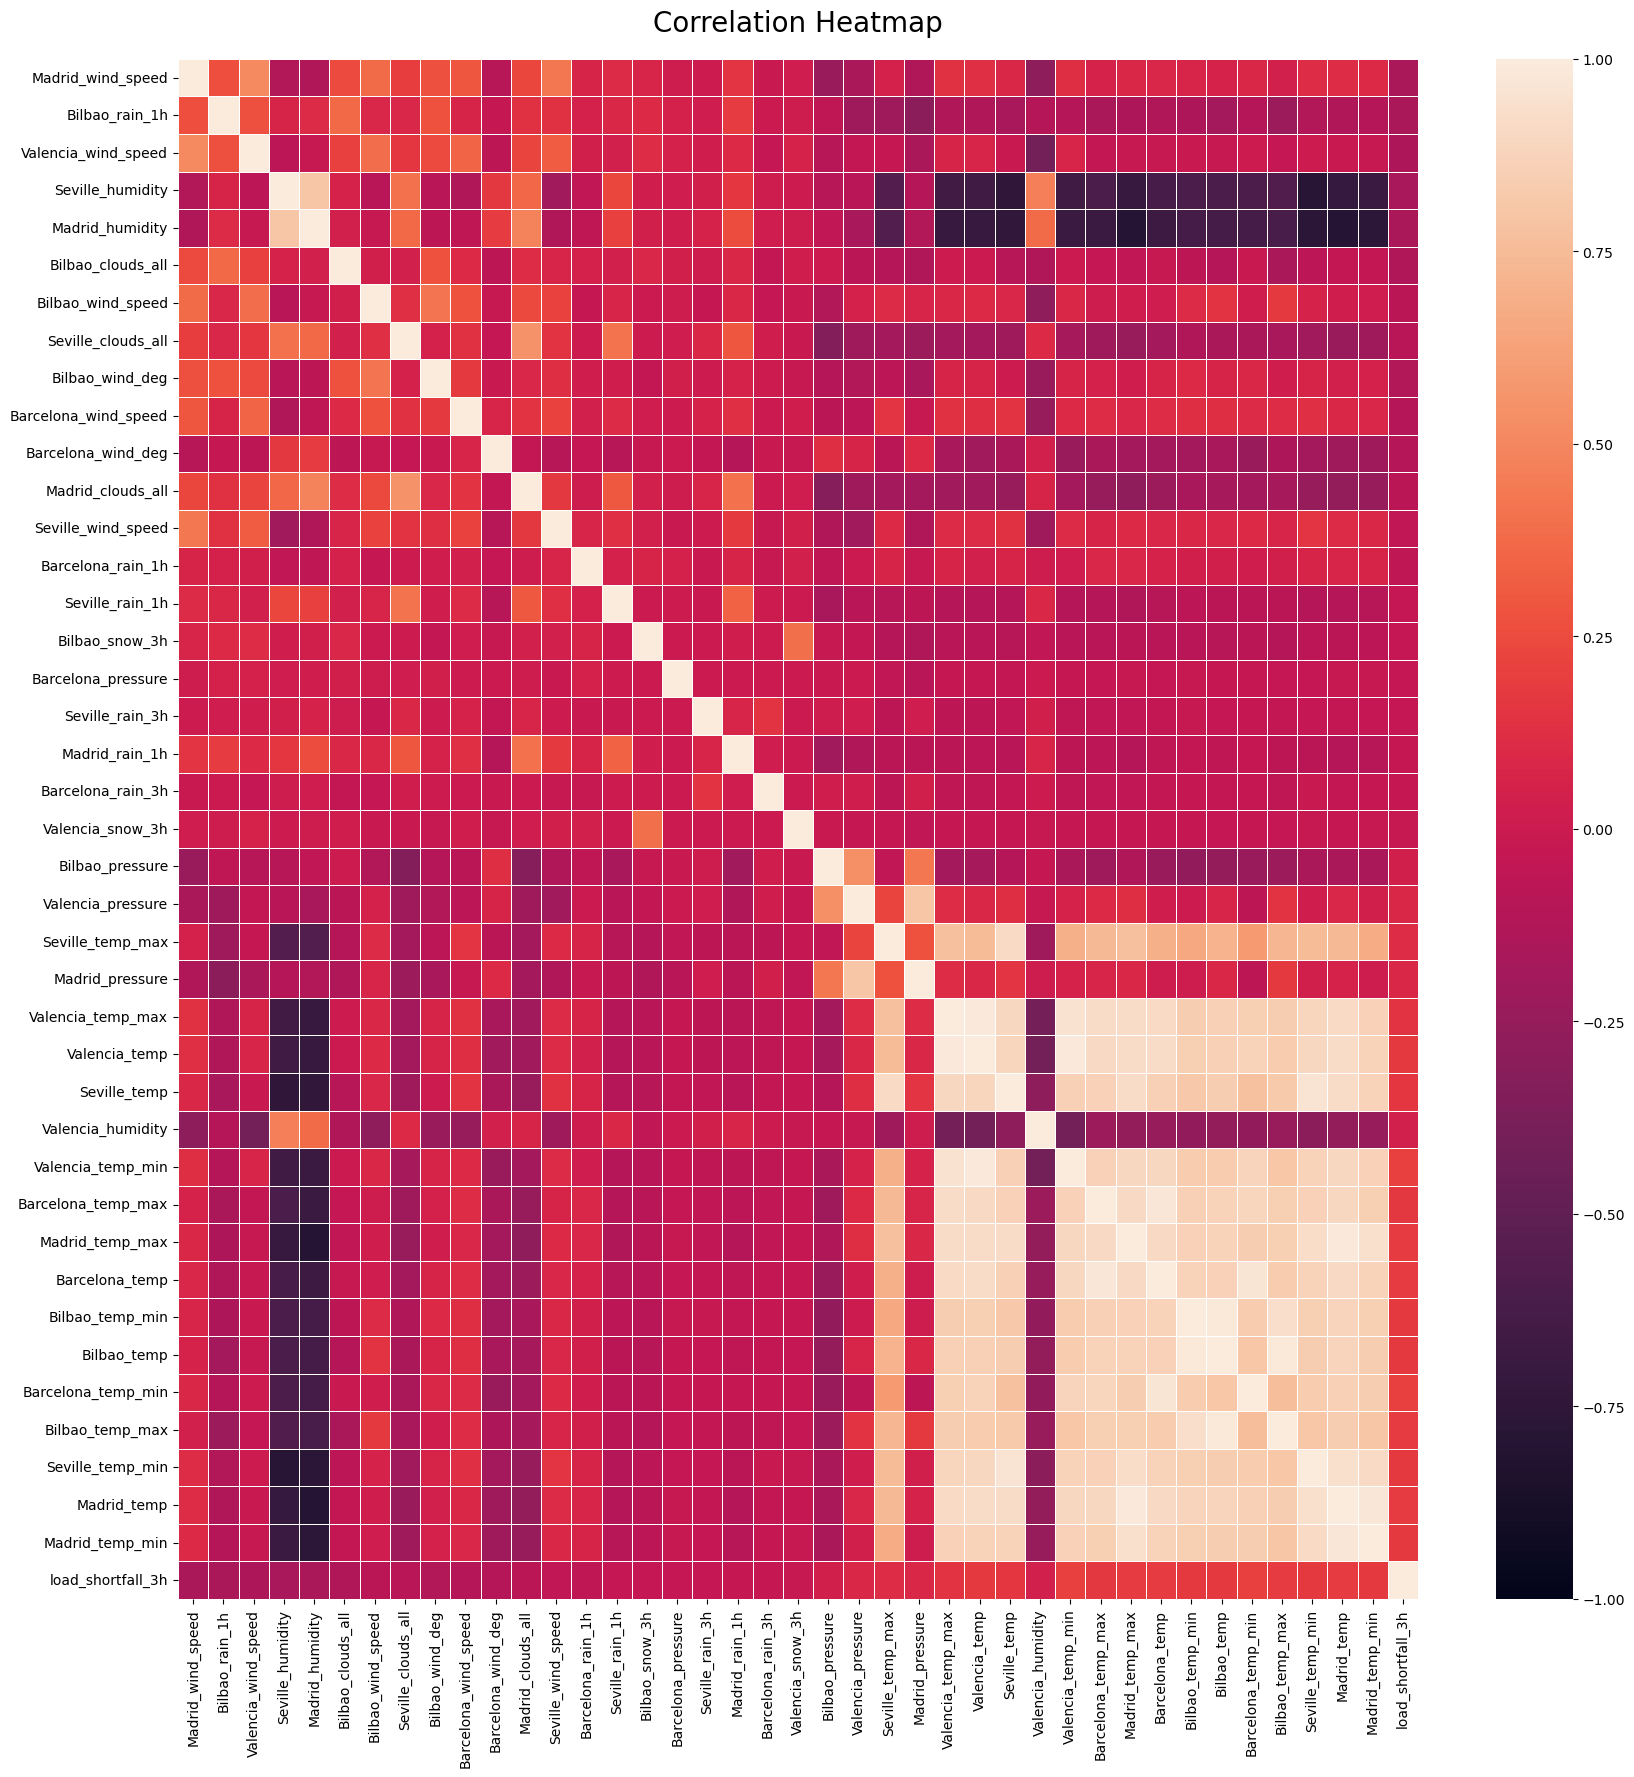

In [46]:
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(df_corr.corr(), vmin=-1, vmax=1, linewidths=0.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=20);

We checking for multicolinearity, the presence of a very strong correlation among the predictor variables is detrimental to the quality of our model, the strong correlation among predictors tends to increase the standard error and makes it difficult to determine the effect of the predictor on the response variable therefore we should give a strong consideration to all the perictor variables in the heatmap above that show a strong correlation with each other and decide if we will consider them in our model development.

### Histograms

load_shortfall_3h   -0.384847
dtype: float64

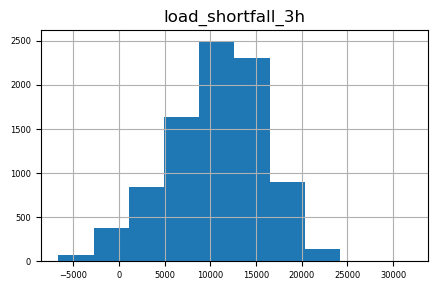

In [47]:
target_v = ['load_shortfall_3h']
df_train[target_v].hist(figsize=(5,3))
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
df_train[target_v].skew()

Our target variable shows a `fairly symmetrical distribution`, the distribution  has a skew value of `-0.384847`, this will be helpful when choosing the regression model to use. Usually if the distribution of the target variable is fairly symmetrical it is suited for the linear regression model.

Madrid_wind_speed       1.441144
Valencia_wind_speed     3.499637
Bilbao_wind_speed       1.716914
Barcelona_wind_speed    1.057331
dtype: float64

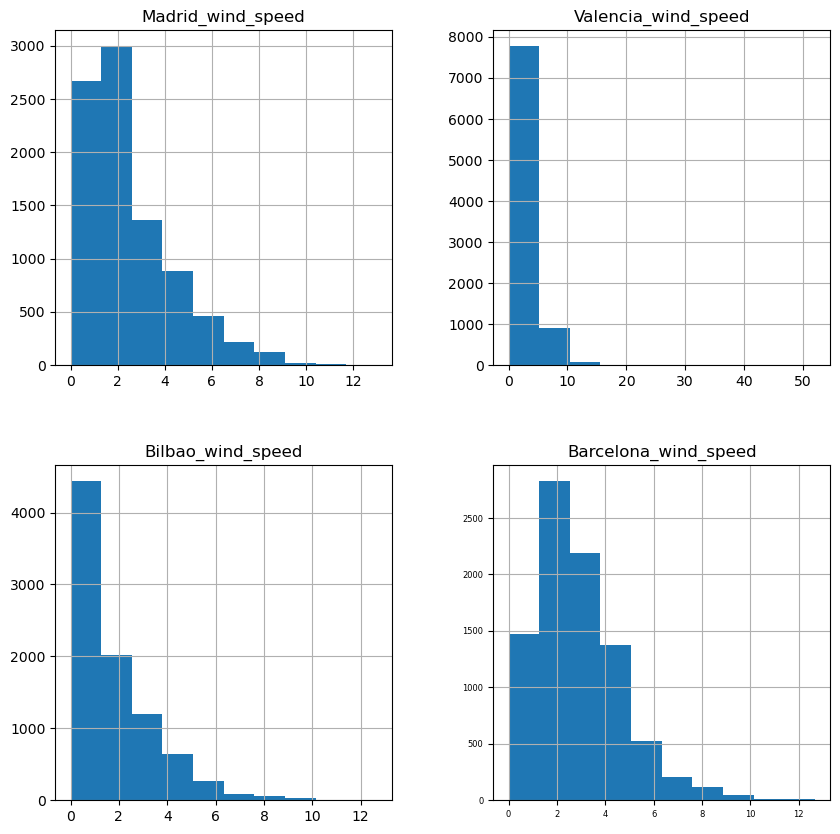

In [48]:
features = ['Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Barcelona_wind_speed']
df_train[features].hist(figsize=(10,10))
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
df_train[features].skew()

The distribution of the wind speed features in of the four different cities is highly positive skewed, we must keep this in mind when we are developing a model as to do we want to include this type of predictors in our model as they may also have high outliers.

In [49]:
x = 'Barcelona_wind_speed' #, 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Barcelona_wind_speed']
sns.boxplot(x, data=df_train);

TypeError: boxplot() got multiple values for argument 'data'

The distribution of the `wind_speed` features is highly positive skewed, would it be possible to use one feature instead of combining them all and use one that has less outliers.

<AxesSubplot:xlabel='Bilbao_snow_3h', ylabel='load_shortfall_3h'>

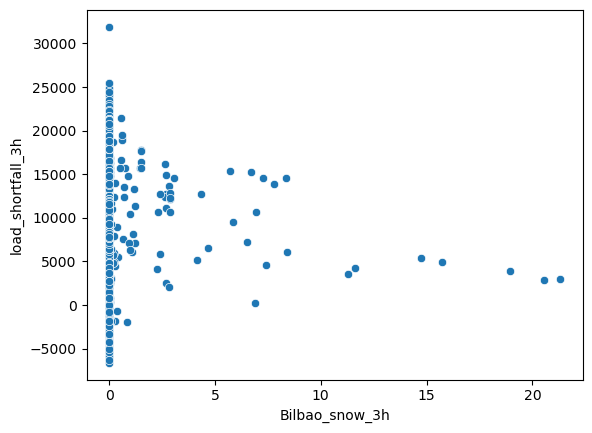

In [50]:
x_var = ['Bilbao_snow_3h']
sns.scatterplot(x="Bilbao_snow_3h", y="load_shortfall_3h", data=df_train)

In [ ]:
# look at data statistics

In [ ]:
# plot relevant feature interactions

In [ ]:
# evaluate correlation

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [51]:
# split data
df_model = df1.copy()

col_to_drop = ['time','Madrid_weather_id', 'Barcelona_weather_id', 'Seville_weather_id', 'Bilbao_weather_id', 'Valencia_pressure', 'Seville_pressure', 'Valencia_wind_deg', "Unnamed: 0"]
df_model1 = df_model.drop(col_to_drop, axis=1)

#Removed the weather id, the categorical data and the feature with high number of missing values

In [52]:
# create targets and features dataset
features = df_model1.drop(['load_shortfall_3h'], axis=1)
target = df_model1['load_shortfall_3h']

In [53]:
# create one or more ML models
lm = LinearRegression()

In [54]:
lm.fit(features, target)

LinearRegression()

In [55]:
model_intercept = float(lm.intercept_)

In [56]:
model_coeff = pd.DataFrame(lm.coef_, features.columns, columns=['Coefficient'])

In [57]:
print('Intercept:', model_intercept)

Intercept: -34542.88807820989


In [58]:
model_coeff

,Coefficient
Madrid_wind_speed,-279.919972
Bilbao_rain_1h,-622.584289
Valencia_wind_speed,-81.146652
Seville_humidity,-39.751880
Madrid_humidity,2.265981
Bilbao_clouds_all,-6.570733
Bilbao_wind_speed,-64.377634
Seville_clouds_all,1.638660
Bilbao_wind_deg,-2.698123
Barcelona_wind_speed,-86.885429


In [59]:
# evaluate one or more ML models
from sklearn import metrics
import math

In [60]:
test_col_drop = ['time','Madrid_weather_id', 'Barcelona_weather_id', 'Seville_weather_id', 'Bilbao_weather_id', 'Valencia_pressure', 'Seville_pressure', 'Valencia_wind_deg', "Unnamed: 0"]
df_test = df_test.drop(test_col_drop, axis=1)

#Drop the unecessary columns from the test dataframe

In [61]:
test_predictors = df_test
predicted_targets = lm.predict(test_predictors)

#predict our target using the test values

In [62]:
print("Train_mse:", metrics.mean_squared_error(target, lm.predict(features)))
#test_mse = metrics.mean_squared_error() #We don't have the test predictors to be able to predict values for ourselves

Train_mse: 23203109.199739467


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [64]:
# Compare model performance
predicted = {"time": df2[df2.columns[1]], "load_shortfall_3h": predicted_targets} # dictionary containing predicted values

date_load = pd.DataFrame(predicted) # dataframe with the date and load_shortfall_3h
date_load.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9538.366294
1,2018-01-01 03:00:00,8942.671863
2,2018-01-01 06:00:00,9842.144475
3,2018-01-01 09:00:00,9659.157784
4,2018-01-01 12:00:00,9112.336816


In [65]:
date_load.to_csv('DN4_base_model.csv',index = False)

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic